Gathering outputs/labels: 100%|██████████| 625/625 [06:27<00:00,  1.61it/s]



NOISE LEVEL 0.0
avg auc 0.6862556706821937


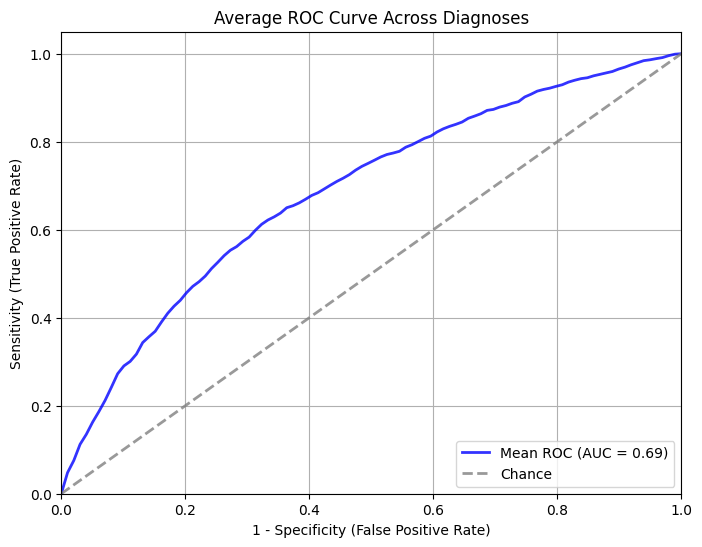

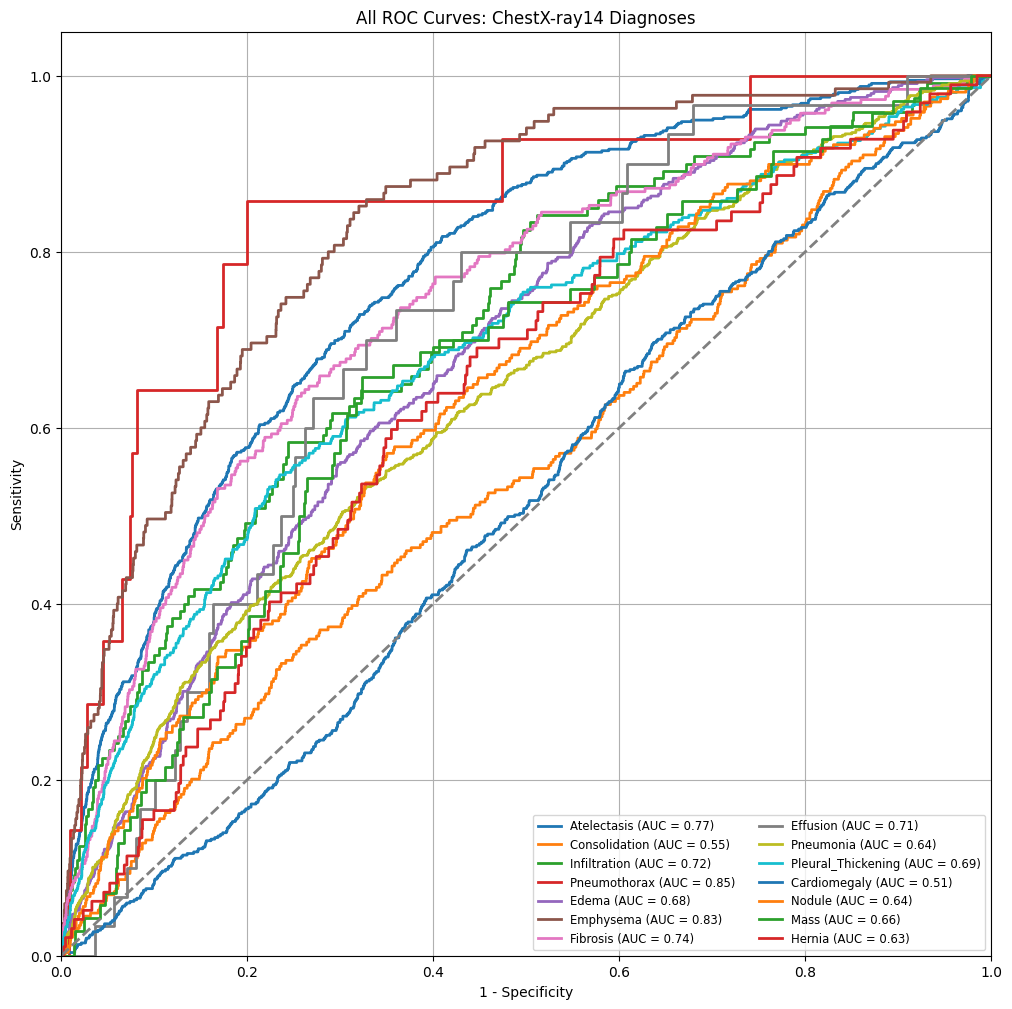

Gathering outputs/labels: 100%|██████████| 625/625 [06:30<00:00,  1.60it/s]



NOISE LEVEL 0.05
avg auc 0.6628547976926898


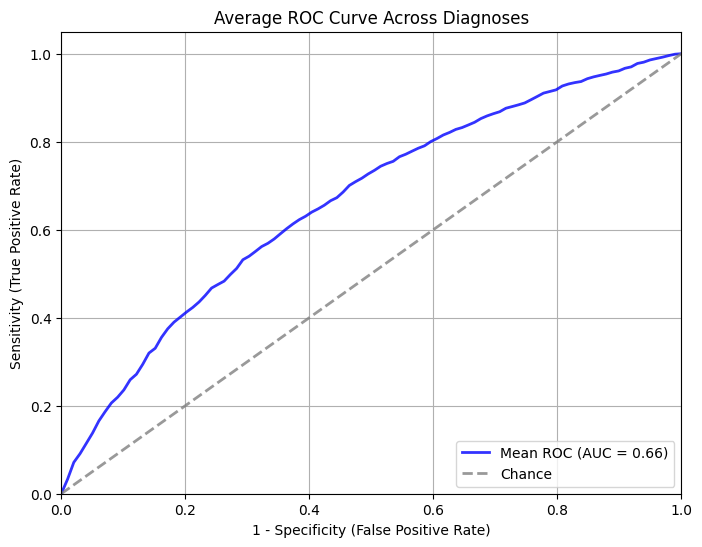

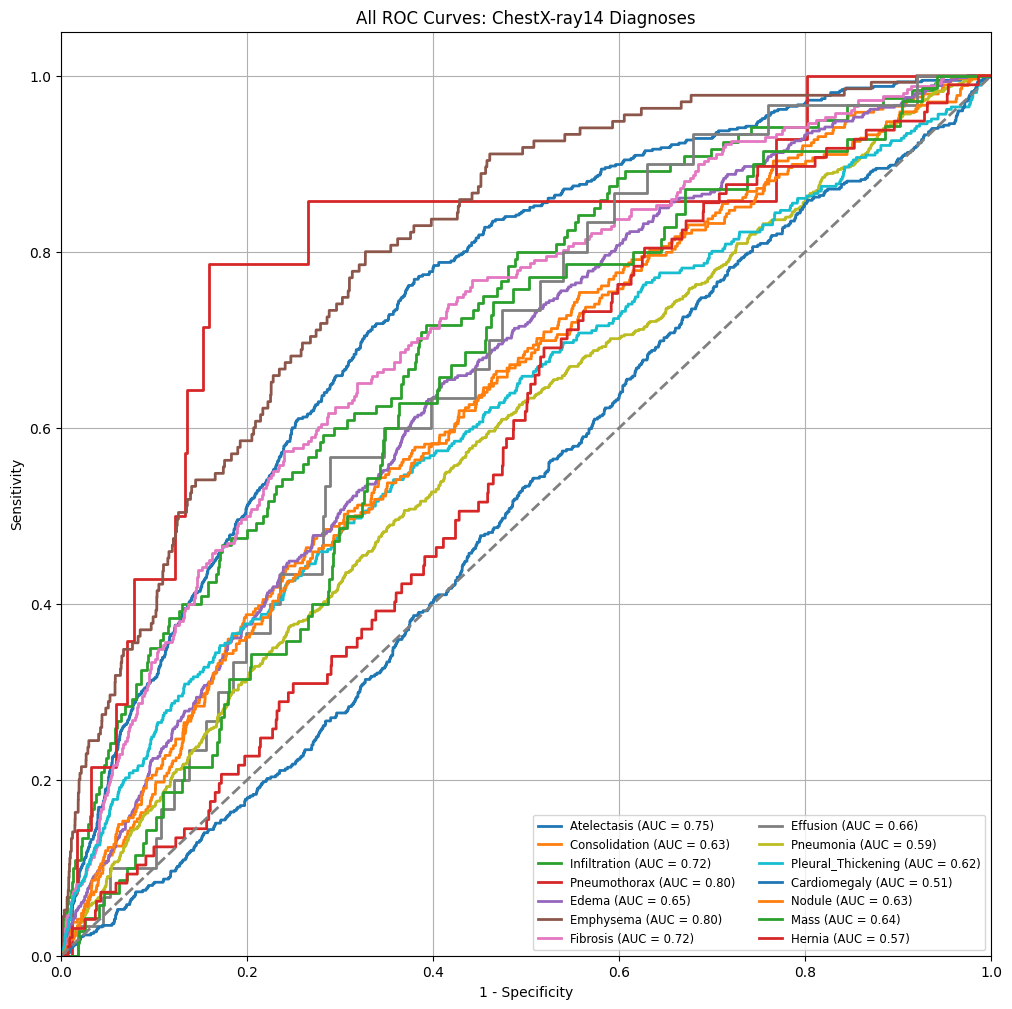

Gathering outputs/labels: 100%|██████████| 625/625 [06:42<00:00,  1.55it/s]



NOISE LEVEL 0.1
avg auc 0.5575513432998342


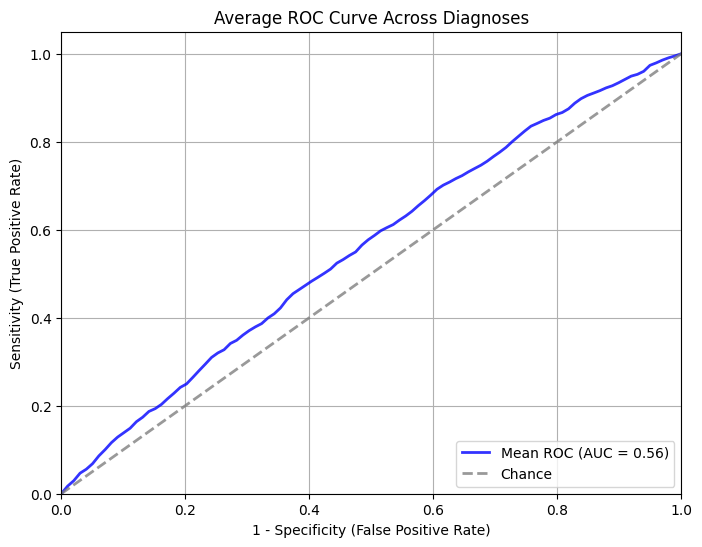

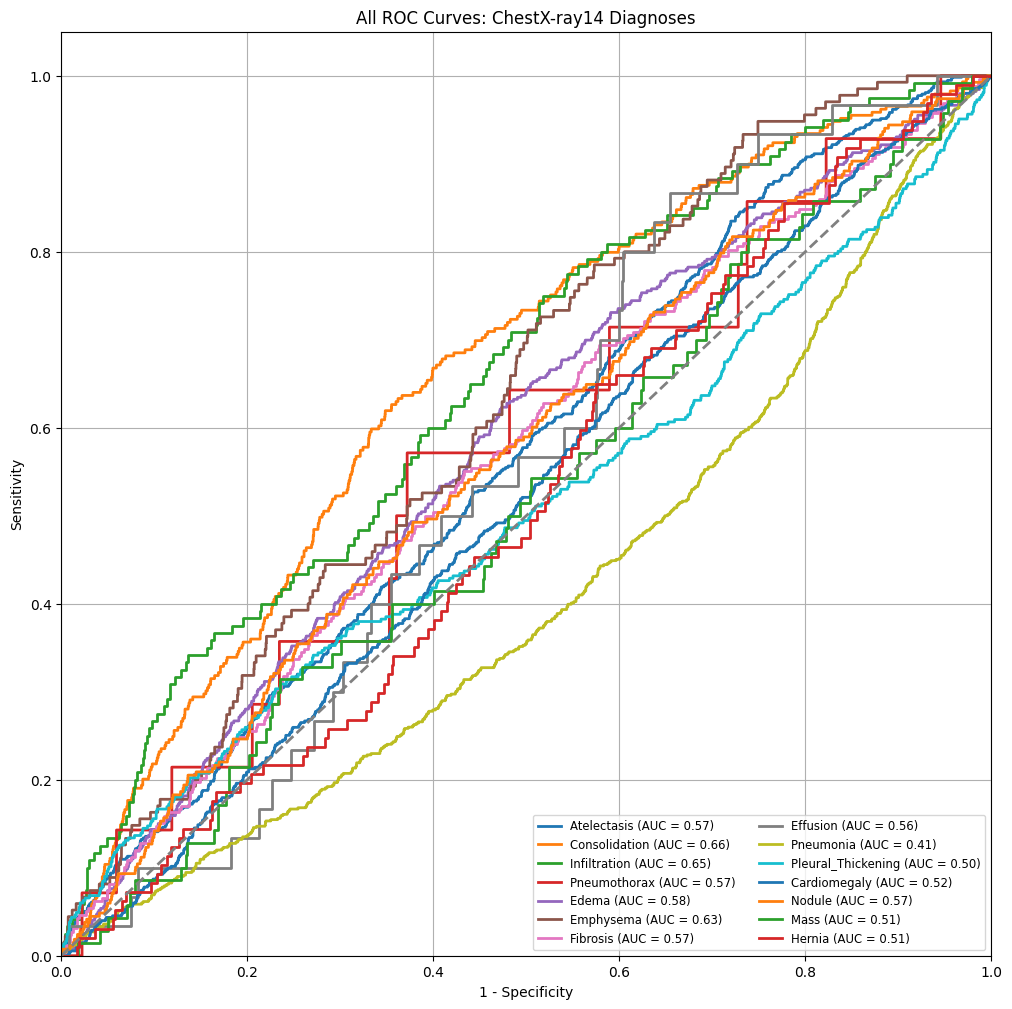

Gathering outputs/labels: 100%|██████████| 625/625 [06:45<00:00,  1.54it/s]



NOISE LEVEL 0.2
avg auc 0.5008308713168684


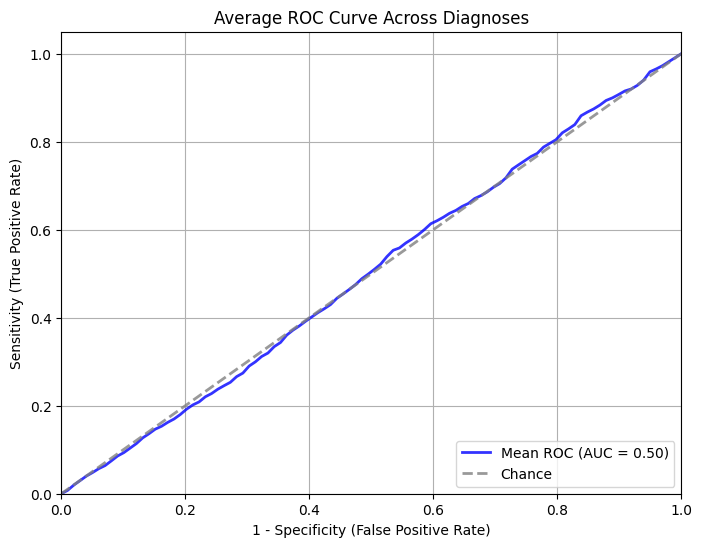

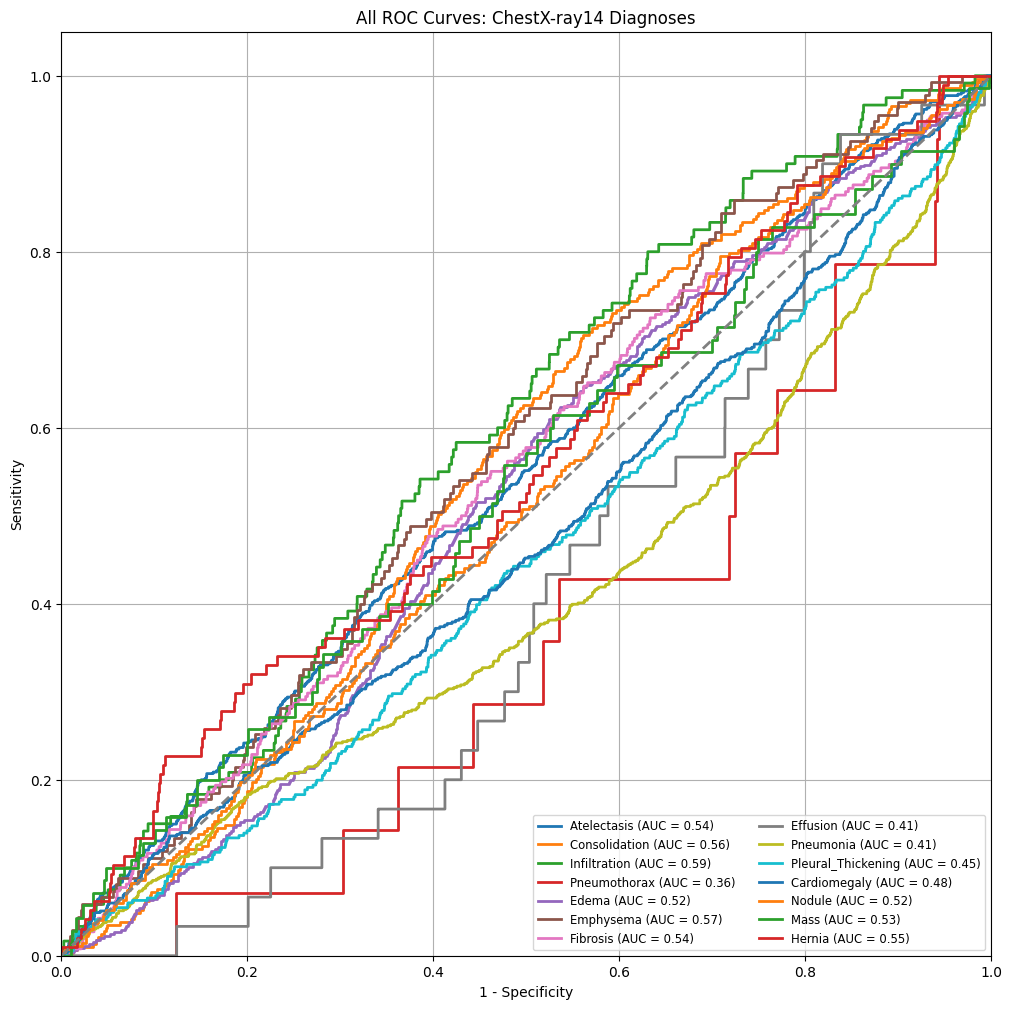

Gathering outputs/labels: 100%|██████████| 625/625 [06:39<00:00,  1.57it/s]



NOISE LEVEL 0.4
avg auc 0.48386752560230634


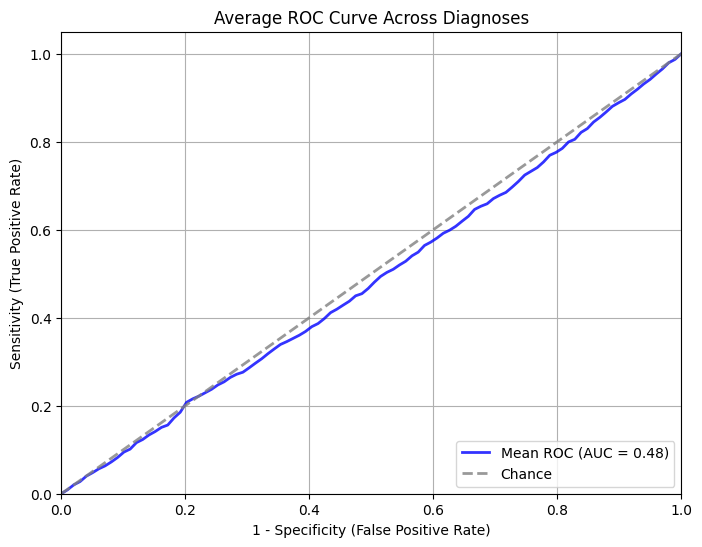

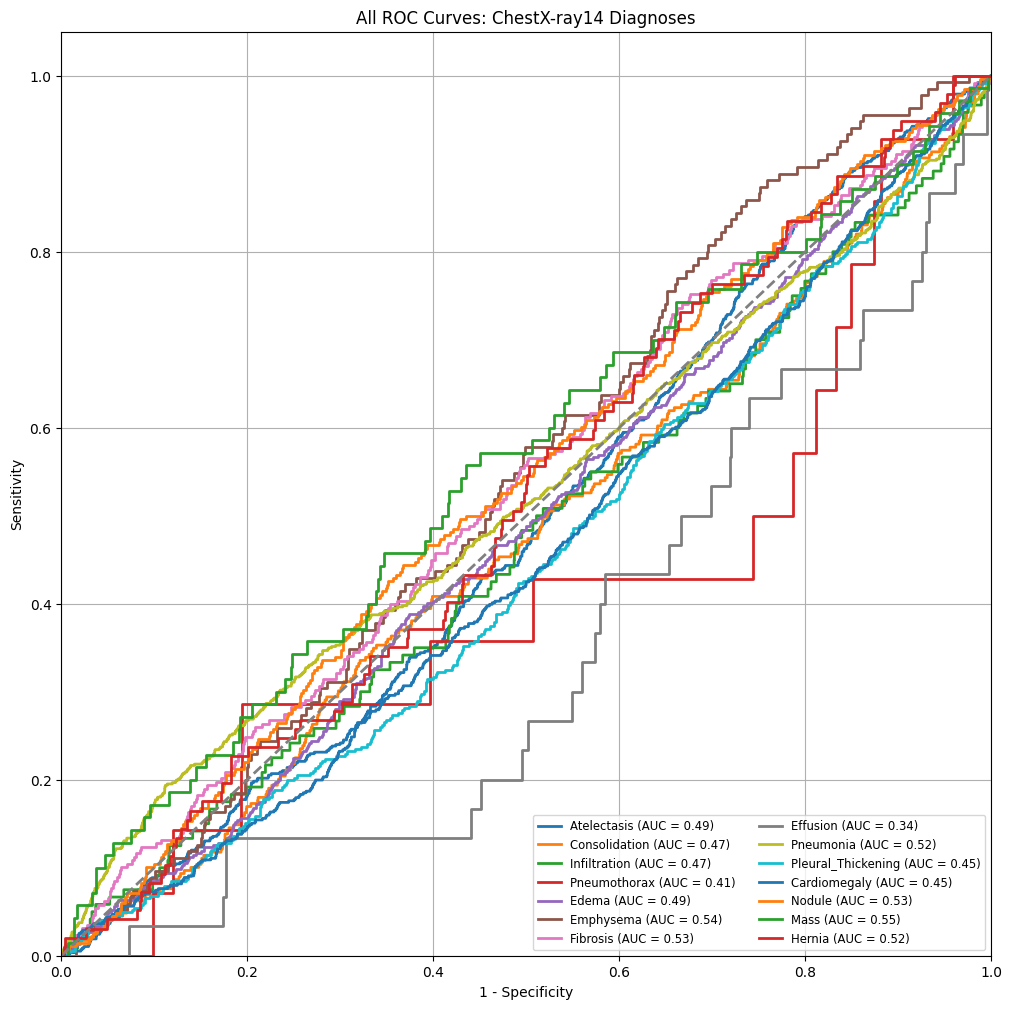

In [ ]:
import torch
import torchxrayvision as xrv
import numpy as np
import matplotlib.pyplot as plt

from utils.cxr_dataset import *
from utils.cxr_processing import *
from utils.diagnosis import *
from utils.auc_roc_utils import *


nih = xrv.datasets.NIH_Dataset("../data/NIH")

nih_tester = NihTester(CxrLabelDataset(xrv.datasets.SubsetDataset(nih, range(10000))), device="cuda")


ax = setup_roc_plot("ROC for noise lvls")


for noise_strength in [0., 0.05, 0.1, 0.2, 0.4]:
    
    noise_mod = NoiseModule(noise_strength)
    nih_tester.gather_outputs_labels_module(noise_mod)

    print(f"\n\nNOISE LEVEL {noise_strength}")

    print("avg auc", nih_tester.avg_diagnosis_auc())
    nih_tester.plot_avg_roc_curve()
    nih_tester.plot_all_roc_curves_single_plot()


    

    



